# Dimensionality Reduction - PCA (Principal Component Analysis)
In this section, we apply PCA to reduce the dimensionality of our dataset while preserving as much variance as possible. PCA transforms the original features into a new set of uncorrelated features called principal components, ordered by the amount of variance they capture

Load the processed heart disease dataset and check its structure

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA


df_scaled = pd.read_csv('/content/processed.cleveland (1).data', header=0)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    float64
 12  12      303 non-null    float64
 13  13      303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#Apply PCA for Dimensionality Reduction
Separate features (X) and target (y) from the dataset.

Perform PCA to reduce the features to 2 principal components.

Fit PCA on all components to calculate cumulative explained variance.

In [ ]:
X = df_scaled.drop(df_scaled.columns[9], axis=1).values
y = df_scaled.iloc[:, 10].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_full = PCA()
pca_full.fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

#Visualize PCA Results
Plot the first two principal components of the dataset.

Color points by their target class to observe any separation.

Use a colorbar to indicate the target values.

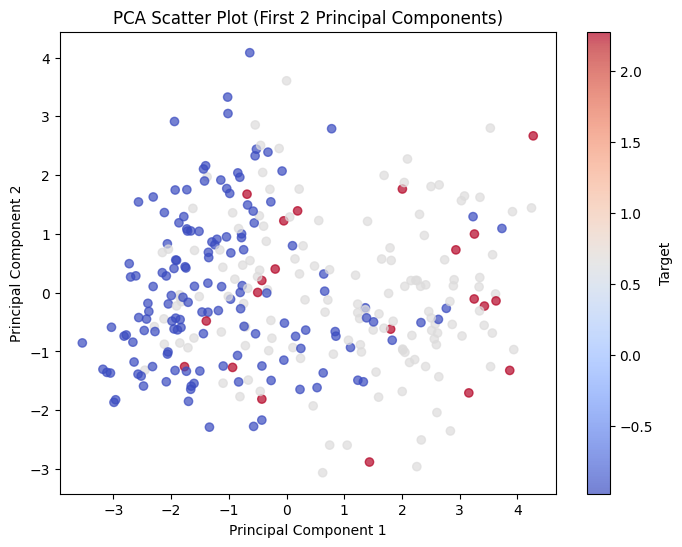

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Scatter Plot (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target')
plt.show()

#Save PCA Transformed Data
Create a DataFrame from the PCA components with meaningful column names (PC1, PC2).

Add the target labels to the DataFrame.

Export the transformed dataset to a CSV file for later use.

In [ ]:
import os

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Create the directory if it doesn't exist
output_dir = '../dataset'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

pca_df.to_csv(os.path.join(output_dir, 'pca_transformed.csv'), index=False)

In [ ]:
from google.colab import files

files.download('../dataset/pca_transformed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>